In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import json
import seaborn as sns
sns.set_palette(sns.color_palette("GnBu_r"))
from IPython import display
import IPython.display as ipd
import sklearn

In [35]:
cwd = os.getcwd()

In [36]:
file_path = os.path.join(cwd, 'coughvid_20211012', 'metadata_compiled.csv')
dir = 'coughvid_20211012'
def retrive_data():
    json_files = []
    audio_files = []
    csv_files = []
    file_list = os.listdir(dir)
    json_file = [file for file in file_list if ".json" in str(file)]
    audio_file = [file for file in file_list if ".wav" in str(file)]
    csv_file = [file for file in file_list if ".csv" in str(file)]
    return json_file, audio_file, csv_file
    
json_files, audio_files, csv_files  = retrive_data()

In [37]:
dt_raw = pd.read_csv(file_path)

In [38]:
dt_raw.head()

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,2021-01-22T22:08:06.742577+00:00,0.1133,47.4,9.4,66.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34434 entries, 0 to 34433
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             34434 non-null  int64  
 1   uuid                   34434 non-null  object 
 2   datetime               34434 non-null  object 
 3   cough_detected         34434 non-null  float64
 4   latitude               19431 non-null  float64
 5   longitude              19431 non-null  float64
 6   age                    19396 non-null  float64
 7   gender                 20664 non-null  object 
 8   respiratory_condition  20664 non-null  object 
 9   fever_muscle_pain      20664 non-null  object 
 10  status                 20664 non-null  object 
 11  status_SSL             8331 non-null   object 
 12  quality_1              820 non-null    object 
 13  cough_type_1           820 non-null    object 
 14  dyspnea_1              820 non-null    object 
 15  wh

In [40]:
dt_raw.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [41]:
dt_raw['datetime'] = pd.to_datetime(dt_raw.datetime)

In [42]:
dt_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34434 entries, 0 to 34433
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             34434 non-null  int64              
 1   uuid                   34434 non-null  object             
 2   datetime               34434 non-null  datetime64[ns, UTC]
 3   cough_detected         34434 non-null  float64            
 4   latitude               19431 non-null  float64            
 5   longitude              19431 non-null  float64            
 6   age                    19396 non-null  float64            
 7   gender                 20664 non-null  object             
 8   respiratory_condition  20664 non-null  object             
 9   fever_muscle_pain      20664 non-null  object             
 10  status                 20664 non-null  object             
 11  status_SSL             8331 non-null   object         

In [48]:
x , sr = librosa.load(dir+'/'+ audio_files[2])
ipd.Audio(dir+'/'+ audio_files[2])

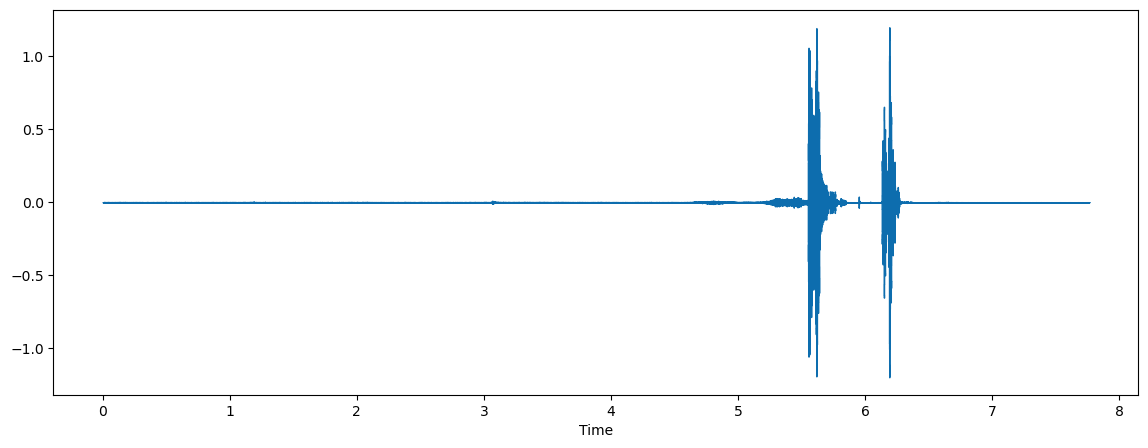

In [49]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

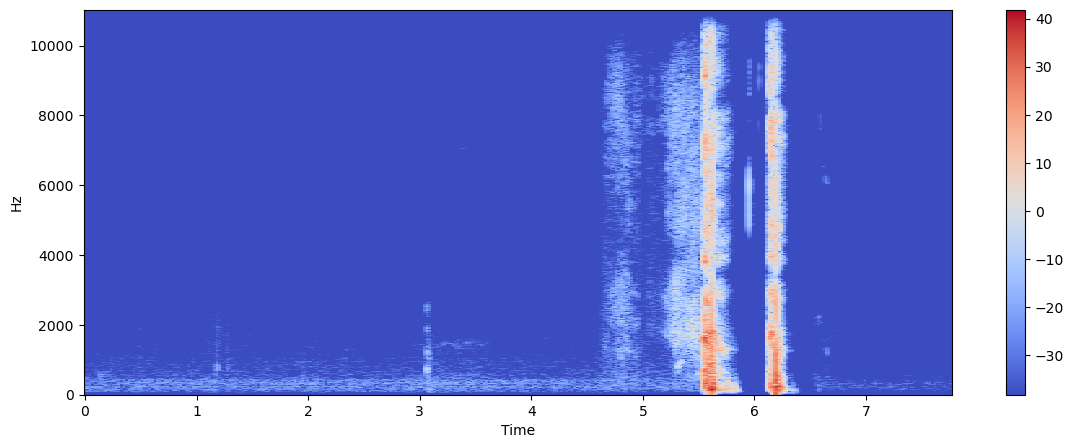

In [50]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

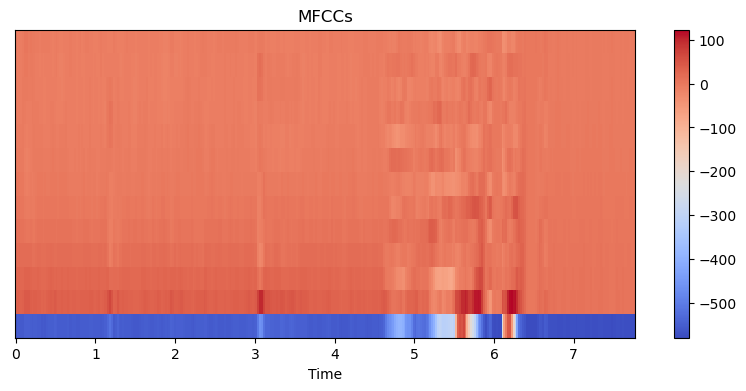

In [62]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = dir + '/' + audio_files[2]
audio, sr = librosa.load(audio_file_path)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11004\2629363466.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')


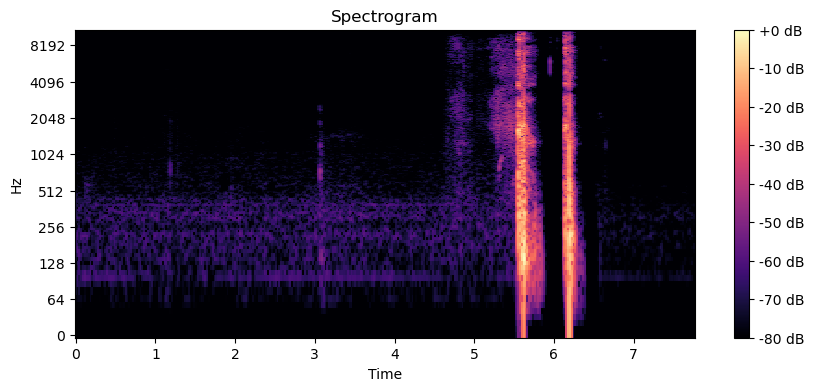

In [63]:
# Compute STFT
stft = librosa.stft(y=audio)

# Visualize the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

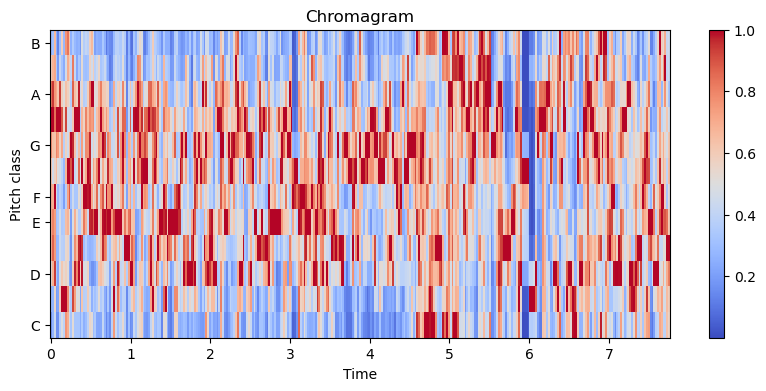

In [64]:
# Compute chromagram
chromagram = librosa.feature.chroma_stft(y=audio, sr=sr)

# Visualize the chromagram
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.show()

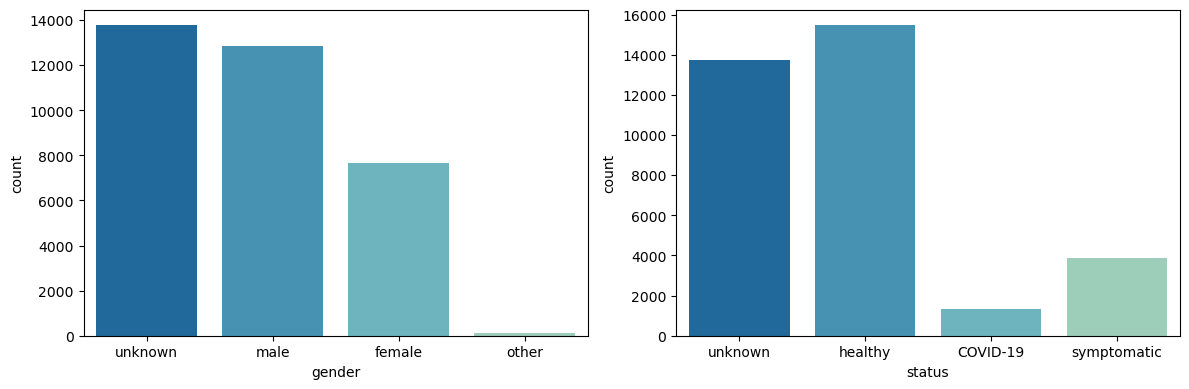

In [52]:
dt_full = dt_raw.fillna('unknown')
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=dt_full, x="gender", ax=axs[0])
sns.countplot(data=dt_full, x="status", ax=axs[1])
f.tight_layout()

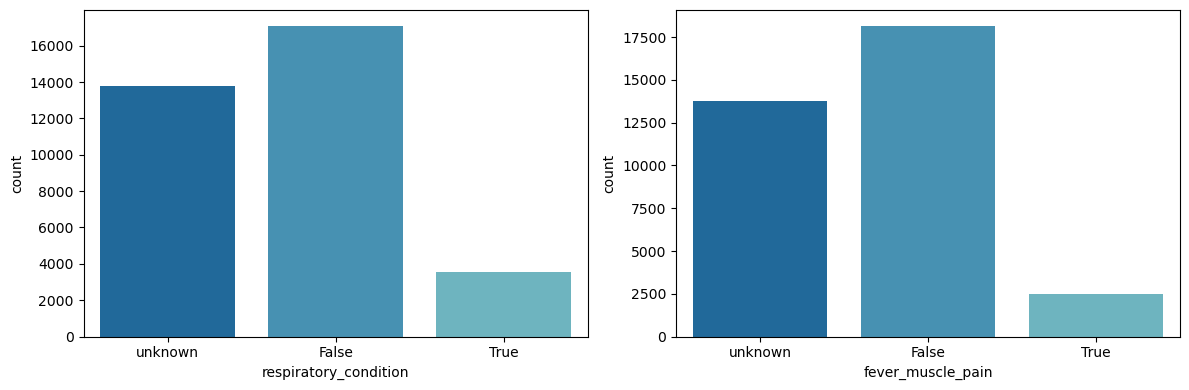

In [78]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=dt_full, x="respiratory_condition", ax=axs[0])
sns.countplot(data=dt_full, x="fever_muscle_pain", ax=axs[1])
f.tight_layout()

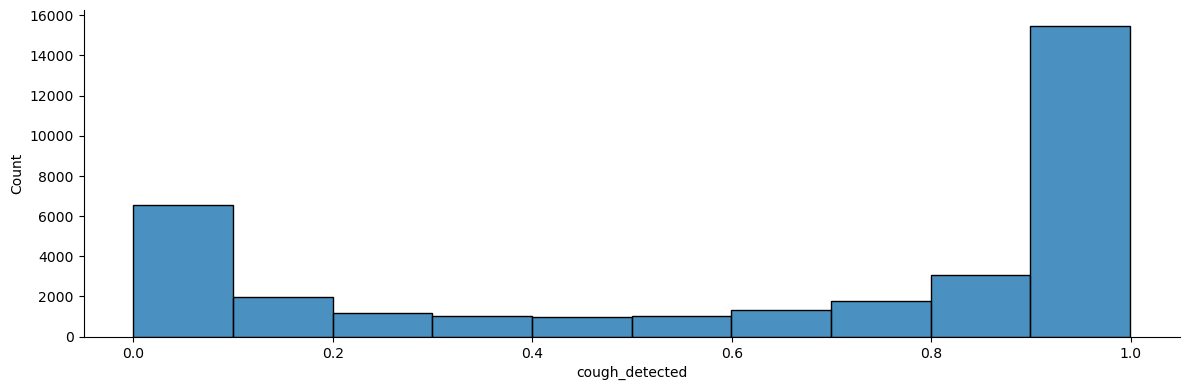

In [66]:
sns.displot(dt_full, x="cough_detected", bins=10, height=4, aspect=3)

In [67]:
def split_by_physicians(df):
    column_names = ['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude', 
                    'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status', 
                    'quality', 'cough_type', 'dyspnea', 'wheezing', 'stridor', 'choking', 
                    'congestion', 'nothing', 'diagnosis', 'severity' ]
    physician_01 = df.iloc[:, 0:21]
    physician_01 = physician_01[physician_01.quality_1.notna()].reset_index(drop=True)
    physician_01.columns = column_names
    physician_01['physician'] = 'P01'

    physician_02 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 21:31]], axis=1)
    physician_02 = physician_02[physician_02.quality_2.notna()].reset_index(drop=True)
    physician_02.columns = column_names
    physician_02['physician'] = 'P02'

    physician_03 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 31:41]], axis=1)
    physician_03 = physician_03[physician_03.quality_3.notna()].reset_index(drop=True)
    physician_03.columns = column_names
    physician_03['physician'] = 'P03'

    physician_04 = pd.concat([df.iloc[:, 0:11], df.iloc[:, 41:51]], axis=1)
    physician_04 = physician_04[physician_04.quality_4.notna()].reset_index(drop=True)
    physician_04.columns = column_names
    physician_04['physician'] = 'P04'
    return physician_01, physician_02, physician_03, physician_04

In [71]:
physician_01, physician_02, physician_03, physician_04 = split_by_physicians(dt_raw)
annot_df = pd.concat([physician_01,physician_02,physician_03,physician_04]).reset_index(drop=True)  
annot_df = annot_df.fillna('unknown')
annot_df.head(3)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity,physician
0,51,006d8d1c-2bf6-46a6-8ef2-1823898a4733,2020-04-22 10:24:21.408615+00:00,0.2677,unknown,unknown,28.0,male,True,True,...,ok,dry,False,False,False,False,False,True,healthy_cough,P01
1,154,01208e5c-5338-4f1b-b8c6-41c049e40d90,2020-04-12 17:13:03.918683+00:00,0.9968,unknown,unknown,unknown,unknown,unknown,unknown,...,poor,dry,False,False,False,False,False,True,lower_infection,P01
2,186,01567151-7bb2-45ee-9aa8-a1332b5941ea,2020-04-14 15:22:08.514166+00:00,0.9820,unknown,unknown,unknown,unknown,unknown,unknown,...,good,dry,False,False,False,True,False,False,COVID-19,P01


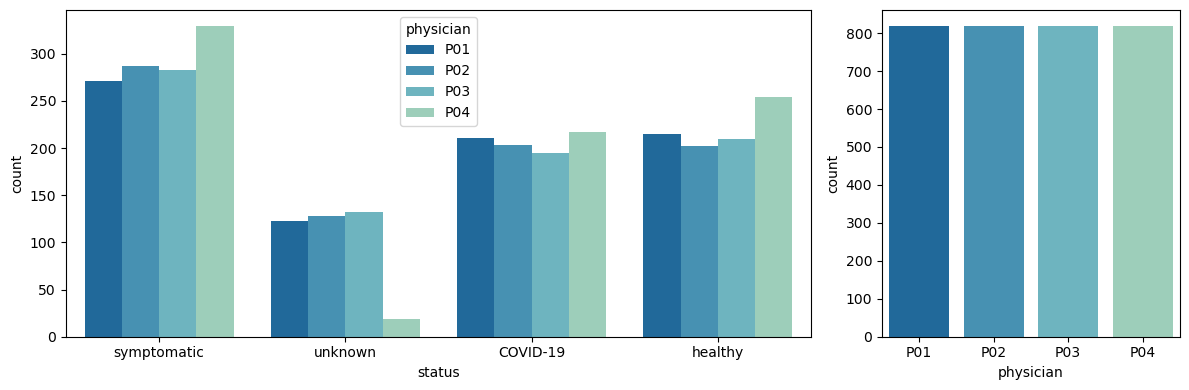

In [76]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10, 4]))
sns.countplot(data=annot_df, x="status", hue='physician', ax=axs[0])
sns.countplot(data=annot_df, x="physician", ax=axs[1])
f.tight_layout()

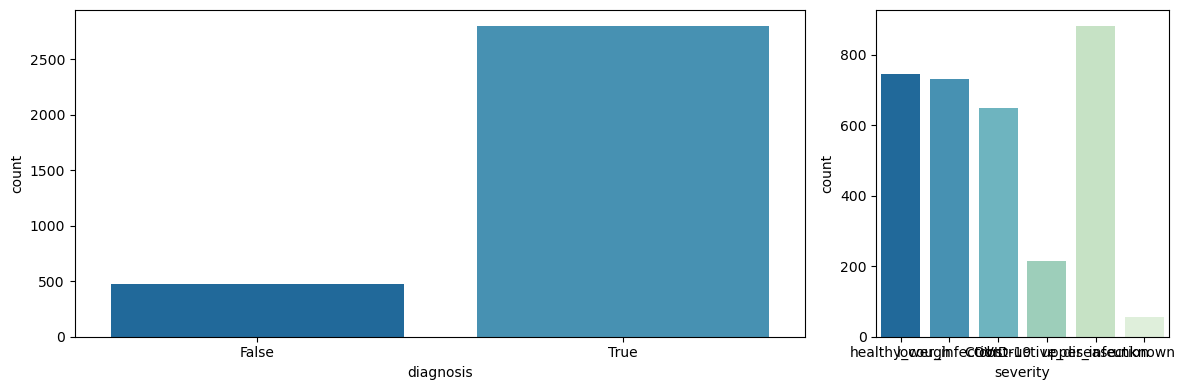

In [79]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[10, 4]))
sns.countplot(data=annot_df, x="diagnosis", ax=axs[0])
sns.countplot(data=annot_df, x="severity", ax=axs[1])
f.tight_layout()

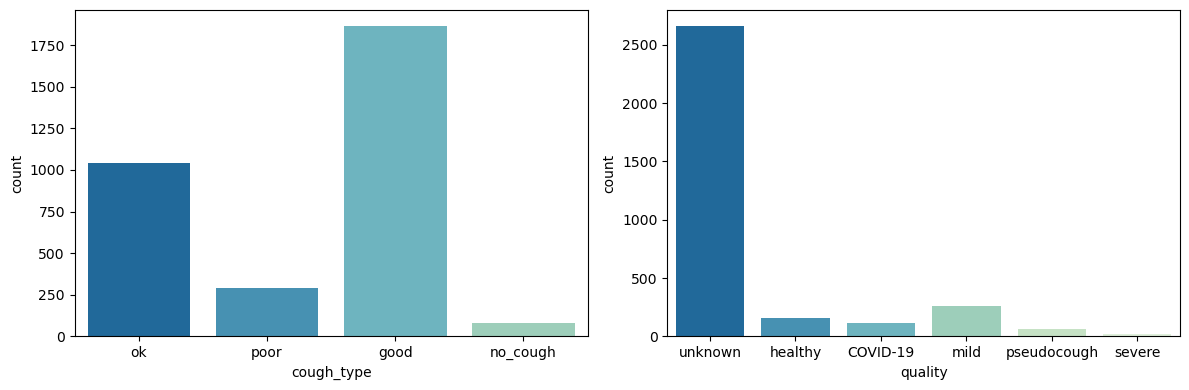

In [80]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annot_df, x="cough_type", ax=axs[0])
sns.countplot(data=annot_df, x="quality", ax=axs[1])
f.tight_layout()

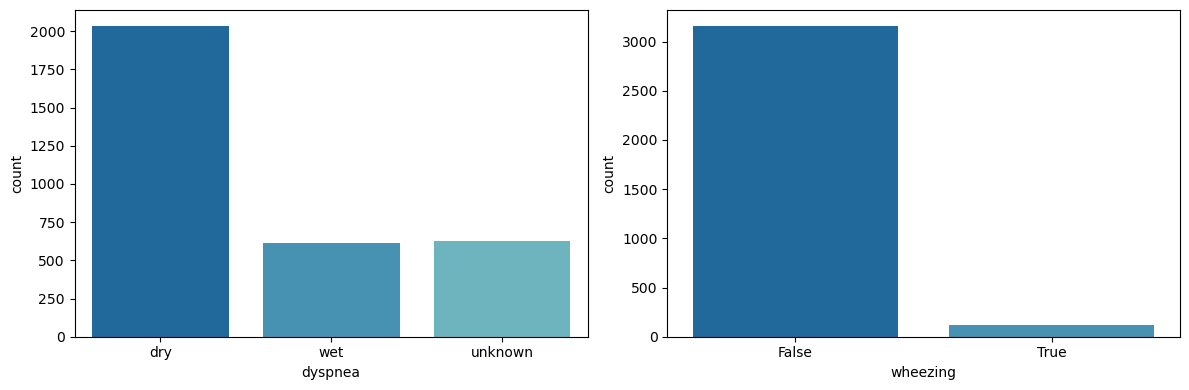

In [82]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annot_df, x="dyspnea", ax=axs[0])
sns.countplot(data=annot_df, x="wheezing", ax=axs[1])
f.tight_layout()

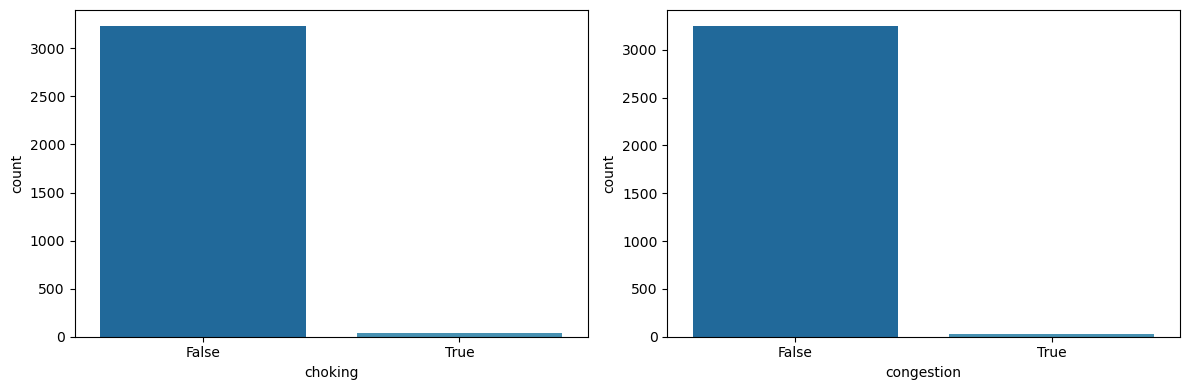

In [83]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.countplot(data=annot_df, x="choking", ax=axs[0])
sns.countplot(data=annot_df, x="congestion", ax=axs[1])
f.tight_layout()